In [2]:
#importing libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from datetime import datetime
import mysql.connector

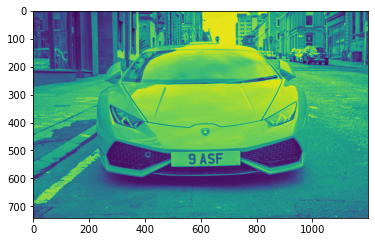

In [3]:
#importing image and converting into grayscale
img = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

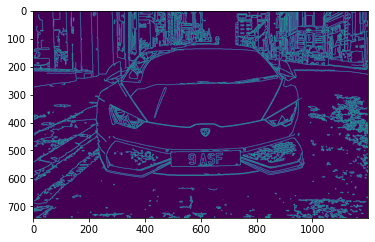

In [4]:
#Detecting Edge
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(edged)

In [5]:
#Finding Contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        
location

array([[[742, 504]],

       [[739, 553]],

       [[494, 554]],

       [[496, 506]]], dtype=int32)

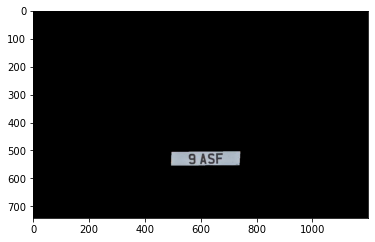

In [6]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

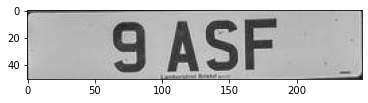

In [7]:
#Cropping the image and turning into grayscale
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [8]:
#Using OCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[56, 0], [194, 0], [194, 51], [56, 51]], '9 ASF', 0.9425894366253015)]

In [8]:
#Results
text2=""
if len(result)>1:
    text = result[0][-2]+" "+result[1][-2]
else:
    text = result[0][-2]
for i in text:
    if i=="," or i=="." or i.isspace():
        i=""
    text2+=i
text2 = text2.upper()
print(text2)

9ASF


In [9]:
#Storing in database
db = mysql.connector.connect(host="localhost",user="root",passwd="root",database="iip")
mycursor = db.cursor()
now = datetime.now()
formatted_date = now.strftime('%Y-%m-%d %H:%M:%S')
mycursor.execute('insert into vehicle(numberplate, time) values(%s, %s)', (text2, formatted_date))
db.commit()
print("Successfully Stored")

Successfully Stored
